In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

Data Collection and Processing

In [12]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car data.csv')

In [13]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


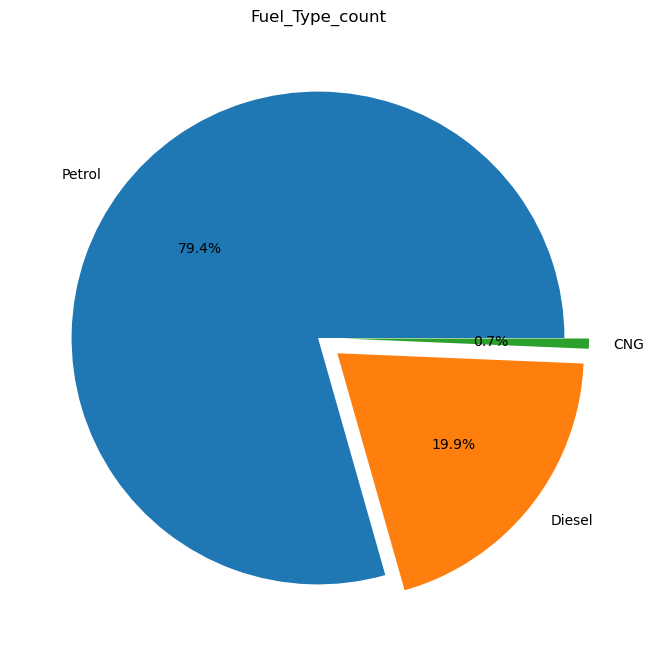

In [28]:
x=car_dataset['Fuel_Type'].value_counts()
label=['Petrol','Diesel','CNG']
plt.figure(figsize=(8,8),dpi=100)
explode=(0,0.1,0.1)
plt.pie(x,labels=label,autopct='%.1f%%',explode=explode)
plt.title('Fuel_Type_count')

plt.show()

In [4]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [5]:
car_dataset.keys()

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [9]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)


In [10]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [9]:
x = car_dataset.drop(['Car_Name','Selling_Price' ], axis = 1)
y = car_dataset['Selling_Price']

In [12]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [13]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

Model Training

1. Linear Regression

In [15]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [16]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [17]:
# prediction on Training data
lin_training_data_prediction = lin_reg_model.predict(x_train)

In [18]:
# R squared Error
error_score = metrics.r2_score(y_train, lin_training_data_prediction)
print('R squared Error: ', error_score)

R squared Error:  0.8806173715719126


Visualize the actual prices and Predicted prices

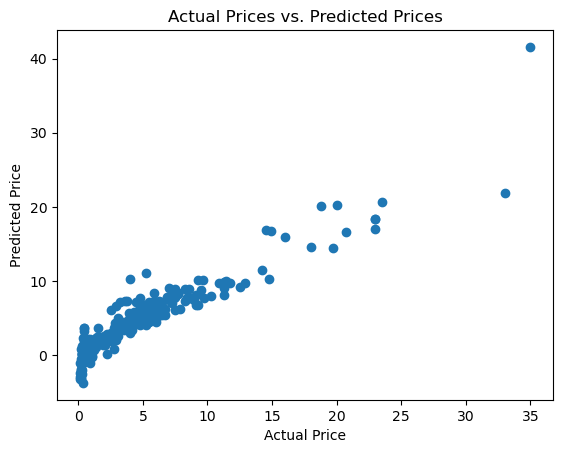

In [19]:
plt.scatter(y_train, lin_training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

In [20]:
# prediction on Training data
lin_test_data_prediction = lin_reg_model.predict(x_test)

In [21]:
# R squared Error
test_error_score = metrics.r2_score(y_test, lin_test_data_prediction)
print("R squared Error: ", test_error_score)

R squared Error:  0.8311069476243867


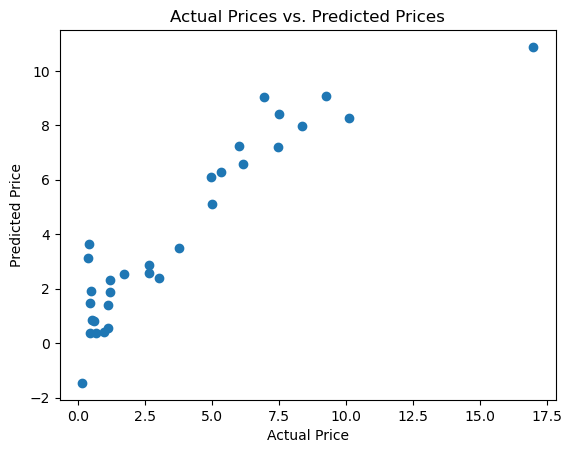

In [22]:
plt.scatter(y_test, lin_test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

2. Lasso Regression

In [23]:
# loading the linear regression model
lasso_model = Lasso()

In [24]:
lasso_model.fit(x_train, y_train)

Lasso()

Model Evaluation

In [25]:
# prediction on Training data
lasso_train_data_prediction = lasso_model.predict(x_train)

In [26]:
# R squared Error
err_score = metrics.r2_score(y_train, lasso_train_data_prediction)
print('R squared Error:', err_score)

R squared Error: 0.8436909482009373


Visualize the actual prices and Predicted prices

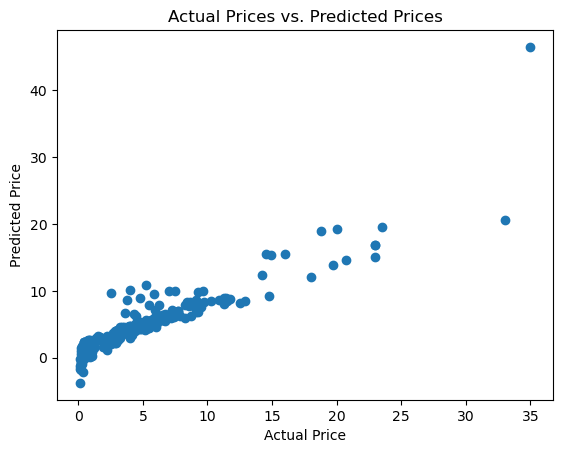

In [27]:
plt.scatter(y_train, lasso_train_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

In [28]:
# prediction on Training data
lasso_test_data_prediction = lasso_model.predict(x_test)

In [29]:
# R squared Error
err_score = metrics.r2_score(y_test, lasso_test_data_prediction)
print('R squared Error:', err_score)

R squared Error: 0.839226320049874


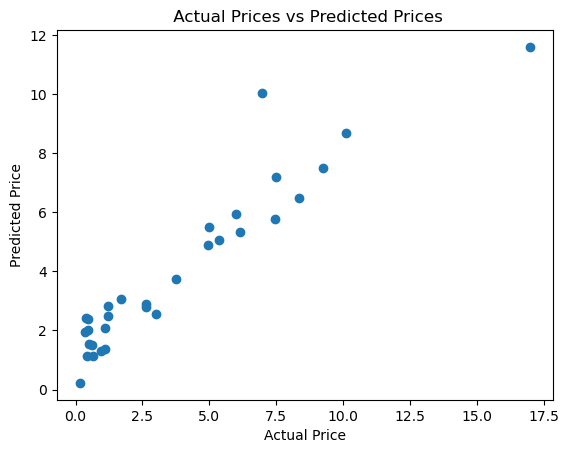

In [30]:
plt.scatter(y_test, lasso_test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [31]:
y_test = list(y_test)

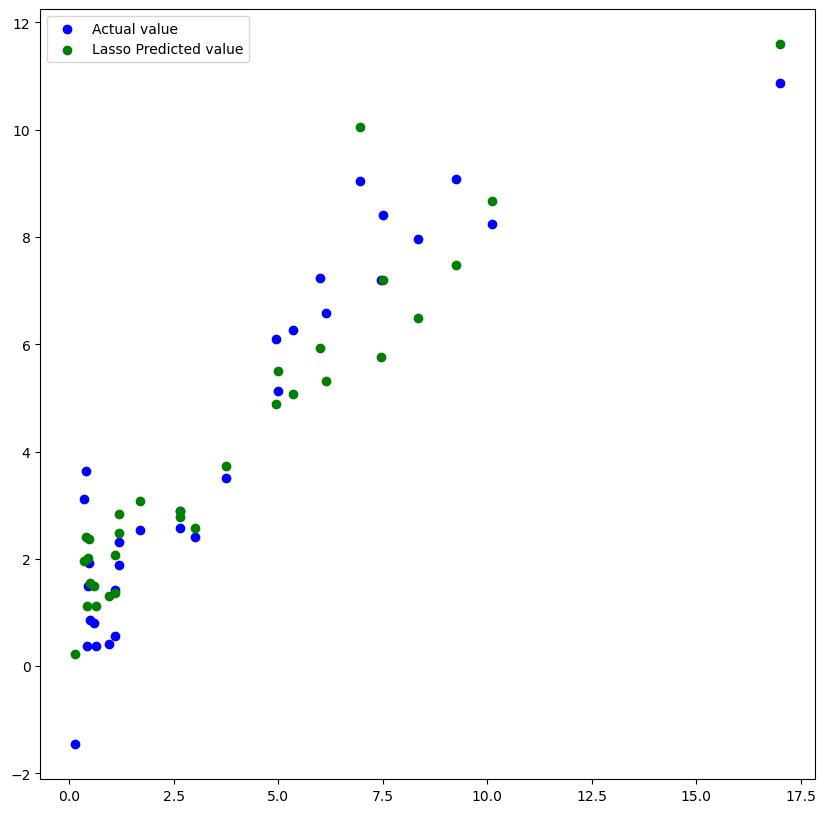

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, lin_test_data_prediction, color='blue', label='Actual value')
plt.scatter(y_test, lasso_test_data_prediction, color='green', label='Lasso Predicted value')
plt.legend()
plt.show()


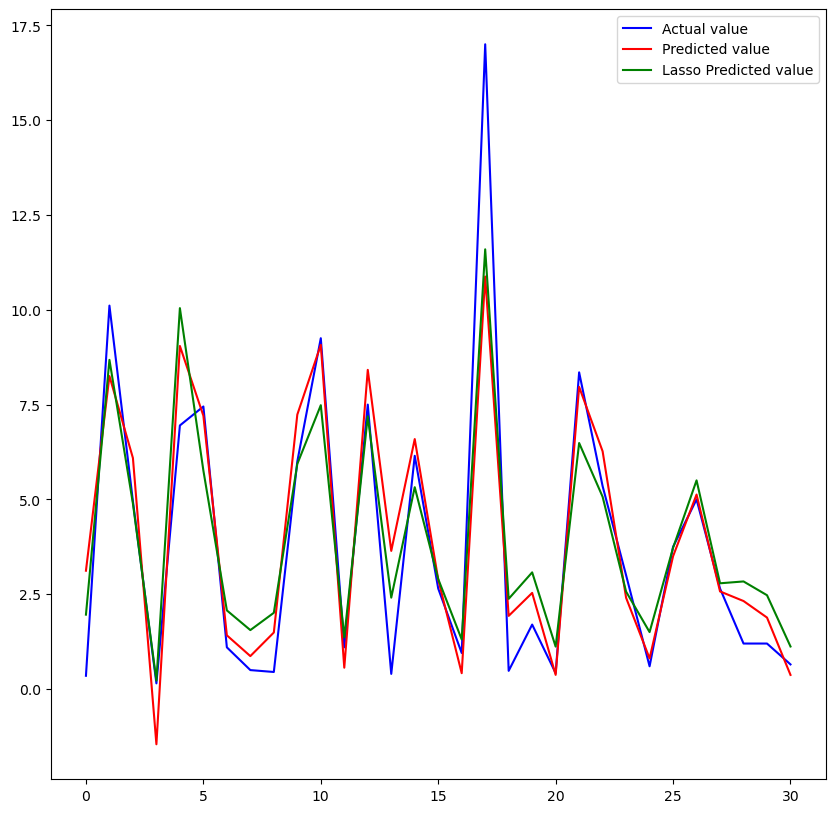

In [33]:
plt.figure(figsize=(10,10))
plt.plot(y_test, color='blue', label='Actual value')
plt.plot(lin_test_data_prediction, color='red', label='Predicted value')
plt.plot(lasso_test_data_prediction, color='green', label='Lasso Predicted value')
plt.legend()
plt.show()
